# Light Test Analysis

## Setup Code (run before plotting)

In [1]:
# preparatory work
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# make plots pretty
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.4)
sns.set_palette("Reds_r")

## Load data

In [2]:
### FILE LOCATION
datafile_path = 'data/lighttest.tsv'

df = pd.DataFrame.from_csv(datafile_path, sep='\t') # load .tsv into dataframe

## Clean and normalize data

In [3]:
df = utils.prepdata(df) # run preparations

# offtimes are the times that the flash ended in sec.
# strings specify which column to convert and name of new column
df = utils.timestamp_to_seconds(df, 'offtime', 'offtimes')

## Split data around events of interest

In [4]:
# PARAMETERS
tpre = -0.3
tpost = 8

chunklist, idx = utils.evtsplit(df, df['offtimes'], tpre, tpost)

norm_data = utils.basenorm(chunklist, idx, [float('-inf'), 0], 0)

norm_pupil = norm_data[idx.get_loc('MeanPupil')]

## Plot

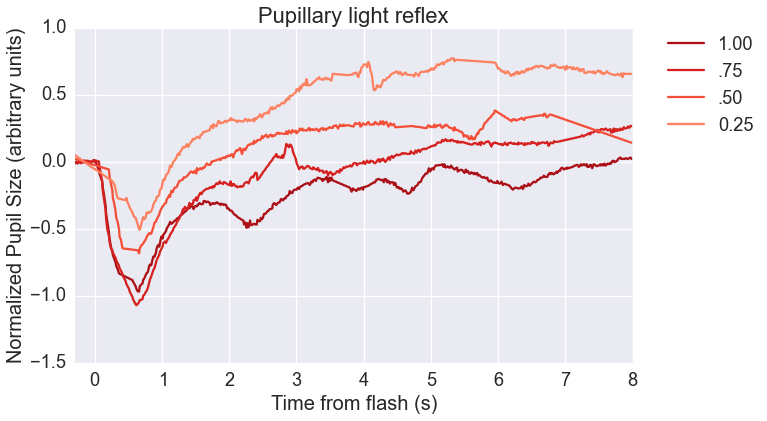

In [5]:
plt.figure(figsize=(10,6))
plt.plot(norm_pupil.index, norm_pupil);
plt.xlim([tpre, tpost])
plt.title('Pupillary light reflex');
plt.ylabel('Normalized Pupil Size (arbitrary units)');
plt.xlabel('Time from flash (s)');
plt.legend(['1.00', '.75', '.50', '0.25'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);